In [58]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
maven_df = pd.read_csv('dac_maven.csv')

In [15]:
maven_df.tail()

,Store_Location,Store_Name,Product_Category,Product_Price,Product_Cost,Date,Units,Sale_Payment_Type,Product_Name,Customer_Satisfaction,Store_City,Sale_ID,Store_ID,Product_ID,Store_Open_Date,Customer_Reference
829257,Residential,Maven Toys Puebla 3,Art & Crafts,$2.99,$1.99,2018-05-15,3,credit,PlayDoh Can,9.0,Puebla,625020,44,25,2014-12-27,Social Media Ad
829258,Residential,Maven Toys Puebla 3,Games,$6.99,$3.99,2017-07-17,1,credit,Deck Of Cards,9.0,Puebla,217169,44,8,2014-12-27,Word of Mouth
829259,Residential,Maven Toys Puebla 3,Art & Crafts,$4.99,$3.99,2017-07-08,1,credit,PlayDoh Toolkit,10.0,Puebla,206813,44,27,2014-12-27,Social Media Ad
829260,Residential,Maven Toys Puebla 3,Sports & Outdoors,$19.99,$14.99,2018-04-02,1,cash,Nerf Gun,9.0,Puebla,556796,44,24,2014-12-27,Social Media Ad
829261,Residential,Maven Toys Puebla 3,Sports & Outdoors,$15.99,$11.99,2017-02-03,1,credit,Dart Gun,8.0,Puebla,31396,44,7,2014-12-27,TV Ad


In [16]:
# Check the shape of the maven_dfFrame
maven_df.nunique()

Store_Location                4
Store_Name                   50
Product_Category              5
Product_Price                18
Product_Cost                 16
Date                        638
Units                        27
Sale_Payment_Type             2
Product_Name                 35
Customer_Satisfaction        10
Store_City                   29
Sale_ID                  829262
Store_ID                     50
Product_ID                   35
Store_Open_Date              50
Customer_Reference            5
dtype: int64

In [17]:
# Check the data types and missing values
maven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store_Location         829262 non-null  object 
 1   Store_Name             829262 non-null  object 
 2   Product_Category       829262 non-null  object 
 3   Product_Price          829262 non-null  object 
 4   Product_Cost           829262 non-null  object 
 5   Date                   829262 non-null  object 
 6   Units                  829262 non-null  int64  
 7   Sale_Payment_Type      829262 non-null  object 
 8   Product_Name           829262 non-null  object 
 9   Customer_Satisfaction  789954 non-null  float64
 10  Store_City             829262 non-null  object 
 11  Sale_ID                829262 non-null  int64  
 12  Store_ID               829262 non-null  int64  
 13  Product_ID             829262 non-null  int64  
 14  Store_Open_Date        829262 non-nu

In [18]:
# Fill missing values in 'Customer_Satisfaction' with the median
# maven_df['Customer_Satisfaction'].fillna(maven_df['Customer_Satisfaction'].median(), inplace=True)

# Check if there are any missing values left
maven_df.isnull().sum()

Store_Location               0
Store_Name                   0
Product_Category             0
Product_Price                0
Product_Cost                 0
Date                         0
Units                        0
Sale_Payment_Type            0
Product_Name                 0
Customer_Satisfaction    39308
Store_City                   0
Sale_ID                      0
Store_ID                     0
Product_ID                   0
Store_Open_Date              0
Customer_Reference           0
dtype: int64

In [19]:
# Checking for duplicates
maven_df.duplicated().sum()

0

Data Cleaning and Analysis of Maven Toys Sales Data

In [20]:
# Convert 'Date' and 'Store_Open_Date' to datetime type
maven_df['Date'] = pd.to_datetime(maven_df['Date'])
maven_df['Store_Open_Date'] = pd.to_datetime(maven_df['Store_Open_Date'])
maven_df['Product_Price'] = maven_df['Product_Price'].str.replace('$', '').astype(float)
maven_df['Product_Cost'] = maven_df['Product_Cost'].str.replace('$', '').astype(float)
maven_df['Product_Category'] = maven_df['Product_Category'].astype('category')
maven_df['Store_Location'] = maven_df['Store_Location'].astype('category')
maven_df['Customer_Reference'] = maven_df['Customer_Reference'].astype('category')
maven_df['Sale_ID'] = maven_df['Sale_ID'].astype(str)
maven_df['Store_ID'] = maven_df['Store_ID'].astype(str)
maven_df['Product_ID'] = maven_df['Product_ID'].astype(str)

# Check the maven_df types again to confirm
maven_df.dtypes


Store_Location                 category
Store_Name                       object
Product_Category               category
Product_Price                   float64
Product_Cost                    float64
Date                     datetime64[ns]
Units                             int64
Sale_Payment_Type                object
Product_Name                     object
Customer_Satisfaction           float64
Store_City                       object
Sale_ID                          object
Store_ID                         object
Product_ID                       object
Store_Open_Date          datetime64[ns]
Customer_Reference             category
dtype: object

In [21]:
maven_df['Customer_Reference'].value_counts()

Customer_Reference
Social Media Ad    313115
Word of Mouth      227179
No Answer          126813
TV Ad              116109
Billboard Ad        46046
Name: count, dtype: int64

In [22]:
maven_df = pd.get_dummies(maven_df, columns=['Store_Location', 'Product_Category', 'Sale_Payment_Type', 'Store_City', 'Customer_Reference'], dtype=int)

In [23]:
maven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Store_Name                          829262 non-null  object        
 1   Product_Price                       829262 non-null  float64       
 2   Product_Cost                        829262 non-null  float64       
 3   Date                                829262 non-null  datetime64[ns]
 4   Units                               829262 non-null  int64         
 5   Product_Name                        829262 non-null  object        
 6   Customer_Satisfaction               789954 non-null  float64       
 7   Sale_ID                             829262 non-null  object        
 8   Store_ID                            829262 non-null  object        
 9   Product_ID                          829262 non-null  object        
 10  Store_Op

In [24]:
maven_df['Product_profit'] = maven_df['Units'] * (maven_df['Product_Price'] - maven_df['Product_Cost'])

maven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Store_Name                          829262 non-null  object        
 1   Product_Price                       829262 non-null  float64       
 2   Product_Cost                        829262 non-null  float64       
 3   Date                                829262 non-null  datetime64[ns]
 4   Units                               829262 non-null  int64         
 5   Product_Name                        829262 non-null  object        
 6   Customer_Satisfaction               789954 non-null  float64       
 7   Sale_ID                             829262 non-null  object        
 8   Store_ID                            829262 non-null  object        
 9   Product_ID                          829262 non-null  object        
 10  Store_Op

In [25]:
# redundant column Store_Name & Store_ID

maven_df = maven_df.drop(columns=['Sale_ID', 'Store_ID', 'Product_ID'])

In [26]:
maven_df['Data_Month'] = maven_df['Date'].dt.month
maven_df['Store_Open_Month'] = maven_df['Store_Open_Date'].dt.month

In [27]:
maven_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 56 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Store_Name                          829262 non-null  object        
 1   Product_Price                       829262 non-null  float64       
 2   Product_Cost                        829262 non-null  float64       
 3   Date                                829262 non-null  datetime64[ns]
 4   Units                               829262 non-null  int64         
 5   Product_Name                        829262 non-null  object        
 6   Customer_Satisfaction               789954 non-null  float64       
 7   Store_Open_Date                     829262 non-null  datetime64[ns]
 8   Store_Location_Airport              829262 non-null  int64         
 9   Store_Location_Commercial           829262 non-null  int64         
 10  Store_Lo

In [28]:
maven_df.isna().sum()

Store_Name                                0
Product_Price                             0
Product_Cost                              0
Date                                      0
Units                                     0
Product_Name                              0
Customer_Satisfaction                 39308
Store_Open_Date                           0
Store_Location_Airport                    0
Store_Location_Commercial                 0
Store_Location_Downtown                   0
Store_Location_Residential                0
Product_Category_Art & Crafts             0
Product_Category_Electronics              0
Product_Category_Games                    0
Product_Category_Sports & Outdoors        0
Product_Category_Toys                     0
Sale_Payment_Type_cash                    0
Sale_Payment_Type_credit                  0
Store_City_Aguascalientes                 0
Store_City_Campeche                       0
Store_City_Chetumal                       0
Store_City_Chihuahua            

In [29]:
maven_df['Customer_Satisfaction'].fillna(maven_df['Customer_Satisfaction'].median(), inplace=True)

In [30]:
maven_df.isna().sum()

Store_Name                            0
Product_Price                         0
Product_Cost                          0
Date                                  0
Units                                 0
Product_Name                          0
Customer_Satisfaction                 0
Store_Open_Date                       0
Store_Location_Airport                0
Store_Location_Commercial             0
Store_Location_Downtown               0
Store_Location_Residential            0
Product_Category_Art & Crafts         0
Product_Category_Electronics          0
Product_Category_Games                0
Product_Category_Sports & Outdoors    0
Product_Category_Toys                 0
Sale_Payment_Type_cash                0
Sale_Payment_Type_credit              0
Store_City_Aguascalientes             0
Store_City_Campeche                   0
Store_City_Chetumal                   0
Store_City_Chihuahua                  0
Store_City_Chilpancingo               0
Store_City_Ciudad Victoria            0


In [31]:
X = maven_df.drop(['Customer_Satisfaction', 'Store_Name', 'Product_Name', 'Date', 'Store_Open_Date'], axis=1)
y = maven_df['Customer_Satisfaction'].copy()

corr_df = X.corr()

corr_df

,Product_Price,Product_Cost,Units,Store_Location_Airport,Store_Location_Commercial,Store_Location_Downtown,Store_Location_Residential,Product_Category_Art & Crafts,Product_Category_Electronics,Product_Category_Games,...,Store_City_Xalapa,Store_City_Zacatecas,Customer_Reference_Billboard Ad,Customer_Reference_No Answer,Customer_Reference_Social Media Ad,Customer_Reference_TV Ad,Customer_Reference_Word of Mouth,Product_profit,Data_Month,Store_Open_Month
Product_Price,1.000000,0.961101,-0.096340,0.004439,0.014612,-0.011929,-0.004416,-0.329830,1.413164e-01,-0.124559,...,1.273674e-02,0.003561,-0.000202,-0.000191,0.000039,0.001386,-0.000863,0.278734,-0.016262,0.006377
Product_Cost,0.961101,1.000000,-0.083454,-0.001258,0.006836,-0.002134,-0.004518,-0.268029,-1.164188e-02,-0.114929,...,1.312680e-02,0.007436,-0.000102,-0.000294,-0.000071,0.001811,-0.001043,0.101423,-0.017383,0.005151
Units,-0.096340,-0.083454,1.000000,0.033833,-0.007878,-0.010206,-0.003109,0.116174,1.722123e-02,-0.043746,...,-1.737493e-03,-0.006415,-0.002309,0.002181,-0.000394,-0.000399,0.000163,0.562843,-0.008336,-0.004624
Store_Location_Airport,0.004439,-0.001258,0.033833,1.000000,-0.160576,-0.351850,-0.108458,-0.016657,1.355750e-02,0.021484,...,-6.183976e-02,-0.038590,0.000092,0.001514,0.000251,-0.001414,-0.000442,0.045698,0.003914,-0.064356
Store_Location_Commercial,0.014612,0.006836,-0.007878,-0.160576,1.000000,-0.627905,-0.193552,-0.022543,4.608857e-02,0.006705,...,1.094502e-01,-0.068867,0.002037,-0.000649,-0.000266,0.001408,-0.001329,0.021238,0.002872,0.117104
Store_Location_Downtown,-0.011929,-0.002134,-0.010206,-0.351850,-0.627905,1.000000,-0.424106,0.025882,-3.769314e-02,-0.012556,...,-9.493019e-03,0.109677,-0.000332,-0.000687,-0.000747,0.000370,0.001249,-0.041354,-0.004301,-0.157602
Store_Location_Residential,-0.004416,-0.004518,-0.003109,-0.108458,-0.193552,-0.424106,1.000000,0.003709,-1.344246e-02,-0.007830,...,-7.453910e-02,-0.046515,-0.002217,0.000601,0.001283,-0.001185,0.000181,-0.003116,-0.000466,0.146343
Product_Category_Art & Crafts,-0.329830,-0.268029,0.116174,-0.016657,-0.022543,0.025882,0.003709,1.000000,-2.217446e-01,-0.291007,...,4.135486e-03,0.023487,-0.000479,0.001487,-0.001764,0.001608,-0.000288,-0.191904,0.035960,0.012332
Product_Category_Electronics,0.141316,-0.011642,0.017221,0.013558,0.046089,-0.037693,-0.013442,-0.221745,1.000000e+00,-0.177964,...,-1.696462e-07,-0.017607,0.000430,-0.000828,0.000459,0.000172,-0.000185,0.433739,-0.023567,0.016015
Product_Category_Games,-0.124559,-0.114929,-0.043746,0.021484,0.006705,-0.012556,-0.007830,-0.291007,-1.779636e-01,1.000000,...,-1.394260e-02,-0.018611,-0.000632,-0.000469,0.000141,-0.001483,0.001703,-0.059130,-0.006277,-0.016937


In [ ]:
mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)

plt.show()

In [33]:
threshold = 0.5

strong_corr_array = np.where(abs(corr_df) > threshold)

strong_corr_pairs = pd.DataFrame({'Variable 1': corr_df.index[strong_corr_array[0]],
                                  'Variable 2': corr_df.columns[strong_corr_array[1]],
                                  'Correlation Coefficient': corr_df.values[strong_corr_array]})

# remove the pairs of same variable

strong_corr_pairs = strong_corr_pairs.loc[strong_corr_pairs['Correlation Coefficient'] != 1]

strong_corr_pairs

,Variable 1,Variable 2,Correlation Coefficient
1,Product_Price,Product_Cost,0.961101
2,Product_Cost,Product_Price,0.961101
5,Units,Product_profit,0.562843
8,Store_Location_Commercial,Store_Location_Downtown,-0.627905
9,Store_Location_Downtown,Store_Location_Commercial,-0.627905
18,Sale_Payment_Type_cash,Sale_Payment_Type_credit,-1.000000
19,Sale_Payment_Type_credit,Sale_Payment_Type_cash,-1.000000
55,Product_profit,Units,0.562843


In [34]:
X[['Product_Price', 'Product_Cost']].describe()

,Product_Price,Product_Cost
count,829262.000000,829262.000000
mean,13.772327,9.976460
std,8.664794,7.817749
min,2.990000,1.990000
25%,6.990000,3.990000
50%,12.990000,7.990000
75%,15.990000,11.990000
max,39.990000,34.990000


In [35]:
# drop product_cost since it has lower std

X.drop(columns=['Product_Cost'], axis=1, inplace=True)

In [36]:
X[['Sale_Payment_Type_cash', 'Sale_Payment_Type_credit']].describe()

,Sale_Payment_Type_cash,Sale_Payment_Type_credit
count,829262.000000,829262.000000
mean,0.314515,0.685485
std,0.464323,0.464323
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [37]:
# drop Sale_Payment_Type_cash since the std is same but the mean of credit is higher - people tend to use credit card

X.drop(columns=['Sale_Payment_Type_cash'], axis=1, inplace=True)

In [38]:
X[['Units', 'Product_profit']].describe()

,Units,Product_profit
count,829262.000000,829262.000000
mean,1.315103,4.840483
std,0.830701,4.476390
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,4.000000
75%,1.000000,6.000000
max,30.000000,150.000000


In [39]:
# drop Units since it has lower std

X.drop(columns=['Units'], axis=1, inplace=True)

In [40]:
X[['Store_Location_Commercial', 'Store_Location_Downtown']].describe()

,Store_Location_Commercial,Store_Location_Downtown
count,829262.000000,829262.000000
mean,0.222734,0.579098
std,0.416082,0.493704
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [41]:
# drop product_cost since it has lower std

X.drop(columns=['Store_Location_Commercial'], axis=1, inplace=True)

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Product_Price                       829262 non-null  float64
 1   Store_Location_Airport              829262 non-null  int64  
 2   Store_Location_Downtown             829262 non-null  int64  
 3   Store_Location_Residential          829262 non-null  int64  
 4   Product_Category_Art & Crafts       829262 non-null  int64  
 5   Product_Category_Electronics        829262 non-null  int64  
 6   Product_Category_Games              829262 non-null  int64  
 7   Product_Category_Sports & Outdoors  829262 non-null  int64  
 8   Product_Category_Toys               829262 non-null  int64  
 9   Sale_Payment_Type_credit            829262 non-null  int64  
 10  Store_City_Aguascalientes           829262 non-null  int64  
 11  Store_City_Campeche       

In [ ]:
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(20,20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, cmap='coolwarm', mask=mask, center=0)

plt.show()

In [44]:
X_withconstant = sm.add_constant(X)

lin_reg = sm.OLS(y,X_withconstant)

lin_reg_fitted = lin_reg.fit()

lin_reg_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.037
Model:                               OLS   Adj. R-squared:                  0.037
Method:                    Least Squares   F-statistic:                     729.3
Date:                   Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                           12:53:25   Log-Likelihood:            -1.7676e+06
No. Observations:                 829262   AIC:                         3.535e+06
Df Residuals:                     829217   BIC:                         3.536e+06
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                               -3.89e+09   9.58e+09     -0.406      0.685   -2.27e+10    1.49e+10
Product_Price                      -7.906e-05      0.000     -0.253      0.800      -0.001       0.001
Store_Location_Airport                 0.0802      0.011      7.075      0.000       0.058       0.102
Store_Location_Downtown               -0.2240      0.007    -33.703      0.000      -0.237      -0.211
Store_Location_Residential             0.3976      0.009     45.808      0.000       0.381       0.415
Product_Category_Art & Crafts      -8.406e+08   9.58e+09     -0.088      0.930   -1.96e+10    1.79e+10
Product_Category_Electronics       -8.406e+08   9.58e+09     -0.088      0.930   -1.96e+10    1.79e+10
Product_Category_Games             -8.406e+08   9.58e+09     -0.088      0.930   -1.96e+10    1.79e+10
Product_Category_Sports & Outdoors -8.406e+08   9.58e+09     -0.088      0.930   -1.96e+10    1.79e+10
Product_Category_Toys              -8.406e+08   9.58e+09     -0.088      0.930   -1.96e+10    1.79e+10
Sale_Payment_Type_credit              -0.0021      0.005     -0.427      0.669      -0.012       0.008
Store_City_Aguascalientes          -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Campeche                -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Chetumal                -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Chihuahua               -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Chilpancingo            -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Ciudad Victoria         -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Cuernavaca              -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Cuidad de Mexico        -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Culiacan                -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Durango                 -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Guadalajara             -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Guanajuato              -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Hermosillo              -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_La Paz                  -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Merida                  -3.429e+08   8.09e+08     -0.424      0.672   -1.93e+09    1.24e+09
Store_City_Mexicali                -3.429e+08   8.09e+08     -0

In [45]:
lin_reg_fitted.rsquared

0.037256830895046944

Based on the summary provided, the p-value for most of columns are notably higher than the predefined significance level of 0.05. Considering dropping this column and re-testing the R-squared value.

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 47 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Product_Price                       829262 non-null  float64
 1   Store_Location_Airport              829262 non-null  int64  
 2   Store_Location_Downtown             829262 non-null  int64  
 3   Store_Location_Residential          829262 non-null  int64  
 4   Product_Category_Art & Crafts       829262 non-null  int64  
 5   Product_Category_Electronics        829262 non-null  int64  
 6   Product_Category_Games              829262 non-null  int64  
 7   Product_Category_Sports & Outdoors  829262 non-null  int64  
 8   Product_Category_Toys               829262 non-null  int64  
 9   Sale_Payment_Type_credit            829262 non-null  int64  
 10  Store_City_Aguascalientes           829262 non-null  int64  
 11  Store_City_Campeche       

In [47]:
selected_columns = ['Store_Location_Airport', 'Store_Location_Downtown', 'Store_Location_Residential', 'Product_profit', 'Store_Open_Month']

X_r = X[selected_columns].copy()

X_r

,Store_Location_Airport,Store_Location_Downtown,Store_Location_Residential,Product_profit,Store_Open_Month
0,1,0,0,5.0,5
1,1,0,0,5.0,5
2,1,0,0,5.0,5
3,1,0,0,6.0,5
4,1,0,0,3.0,5
...,...,...,...,...,...
829257,0,0,1,3.0,12
829258,0,0,1,3.0,12
829259,0,0,1,1.0,12
829260,0,0,1,5.0,12


In [62]:
X_withconstant_r = sm.add_constant(X_r)

lin_reg = sm.OLS(y,X_withconstant_r)

lin_reg_fitted = lin_reg.fit()

lin_reg_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.006
Model:                               OLS   Adj. R-squared:                  0.006
Method:                    Least Squares   F-statistic:                     950.9
Date:                   Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                           13:20:01   Log-Likelihood:            -1.7810e+06
No. Observations:                 829262   AIC:                         3.562e+06
Df Residuals:                     829256   BIC:                         3.562e+06
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          8.7471      0.008   1139.783      0.000       8.732       8.762
Store_Location_Airport        -0.3239      0.009    -34.710      0.000      -0.342      -0.306
Store_Location_Downtown       -0.1856      0.006    -32.360      0.000      -0.197      -0.174
Store_Location_Residential     0.2558      0.008     30.970      0.000       0.240       0.272
Product_profit                -0.0020      0.001     -4.019      0.000      -0.003      -0.001
Store_Open_Month              -0.0152      0.001    -21.645      0.000      -0.017      -0.014
==============================================================================
Omnibus:                   508297.948   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4301320.760
Skew:                          -2.965   Prob(JB):                         0.00
Kurtosis:                      12.450   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lin_reg_fitted.rsquared

0.005700556347962293

In [50]:
model_residuls = lin_reg_fitted.resid

model_residuls.head()

0    0.663160
1   -1.336840
2    1.663160
3    0.665206
4   -0.340933
dtype: float64

In [51]:
model_fittedvals = lin_reg_fitted.fittedvalues

model_fittedvals.head()

0    8.336840
1    8.336840
2    8.336840
3    8.334794
4    8.340933
dtype: float64

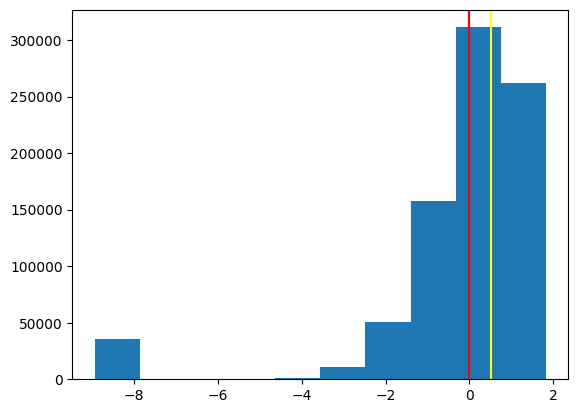

In [55]:
plt.figure()

plt.hist(model_residuls, bins = 10)
plt.axvline(model_residuls.median(), color='yellow')
plt.axvline(model_residuls.mean(), color='red')

plt.show()

In [59]:
tstat, pval = stats.shapiro(model_residuls)
print(f'Shapiro-Wilk test on residuals: p-value = {pval}')

Shapiro-Wilk test on residuals: p-value = 0.0


/Library/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


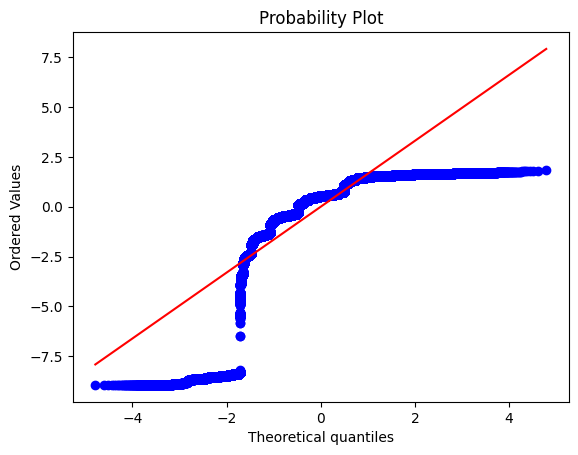

In [60]:
plt.figure()

stats.probplot(model_residuls, dist="norm", plot = plt)

plt.show()

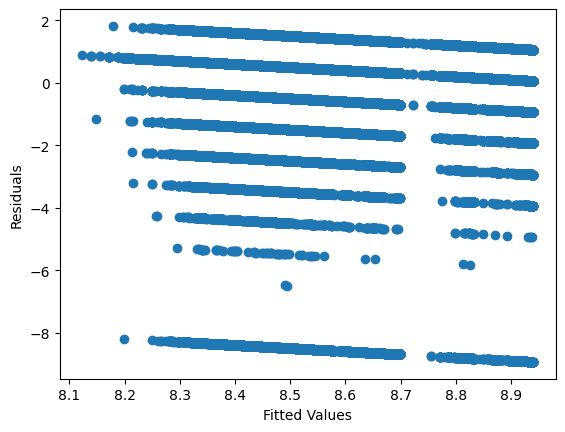

In [61]:
plt.figure()

plt.scatter(model_fittedvals, model_residuls)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()